In [1]:
import requests
import pandas as pd
from IPython.display import Image
import plotly.express as px

In [2]:
url = "http://13.212.85.6:5000/api/v1/" # running on ec2 instance
localhost = "http://localhost:5000/api/v1" # use localhost if running API locally

In [3]:
def create_plot(cameraID: int):
    r = requests.get(url+"history", params={"cameraID":cameraID})
    df = pd.DataFrame(r.json())
    fig = px.line(df, x='timestamp', y=['density1','density2'], title=f"Time-TrafficDensity Plot for Camera {df['CameraID'].iloc[0]}")
    return fig

def image(cameraID: int):
    r = requests.get(url+"image", params={"cameraID":cameraID})
    return Image(r.content)

def record(cameraID: int) -> pd.DataFrame:
    r = requests.get(url+"record", params={"cameraID":cameraID})
    return pd.DataFrame(r.json())


In [4]:
fig = create_plot(1702)
fig.show()

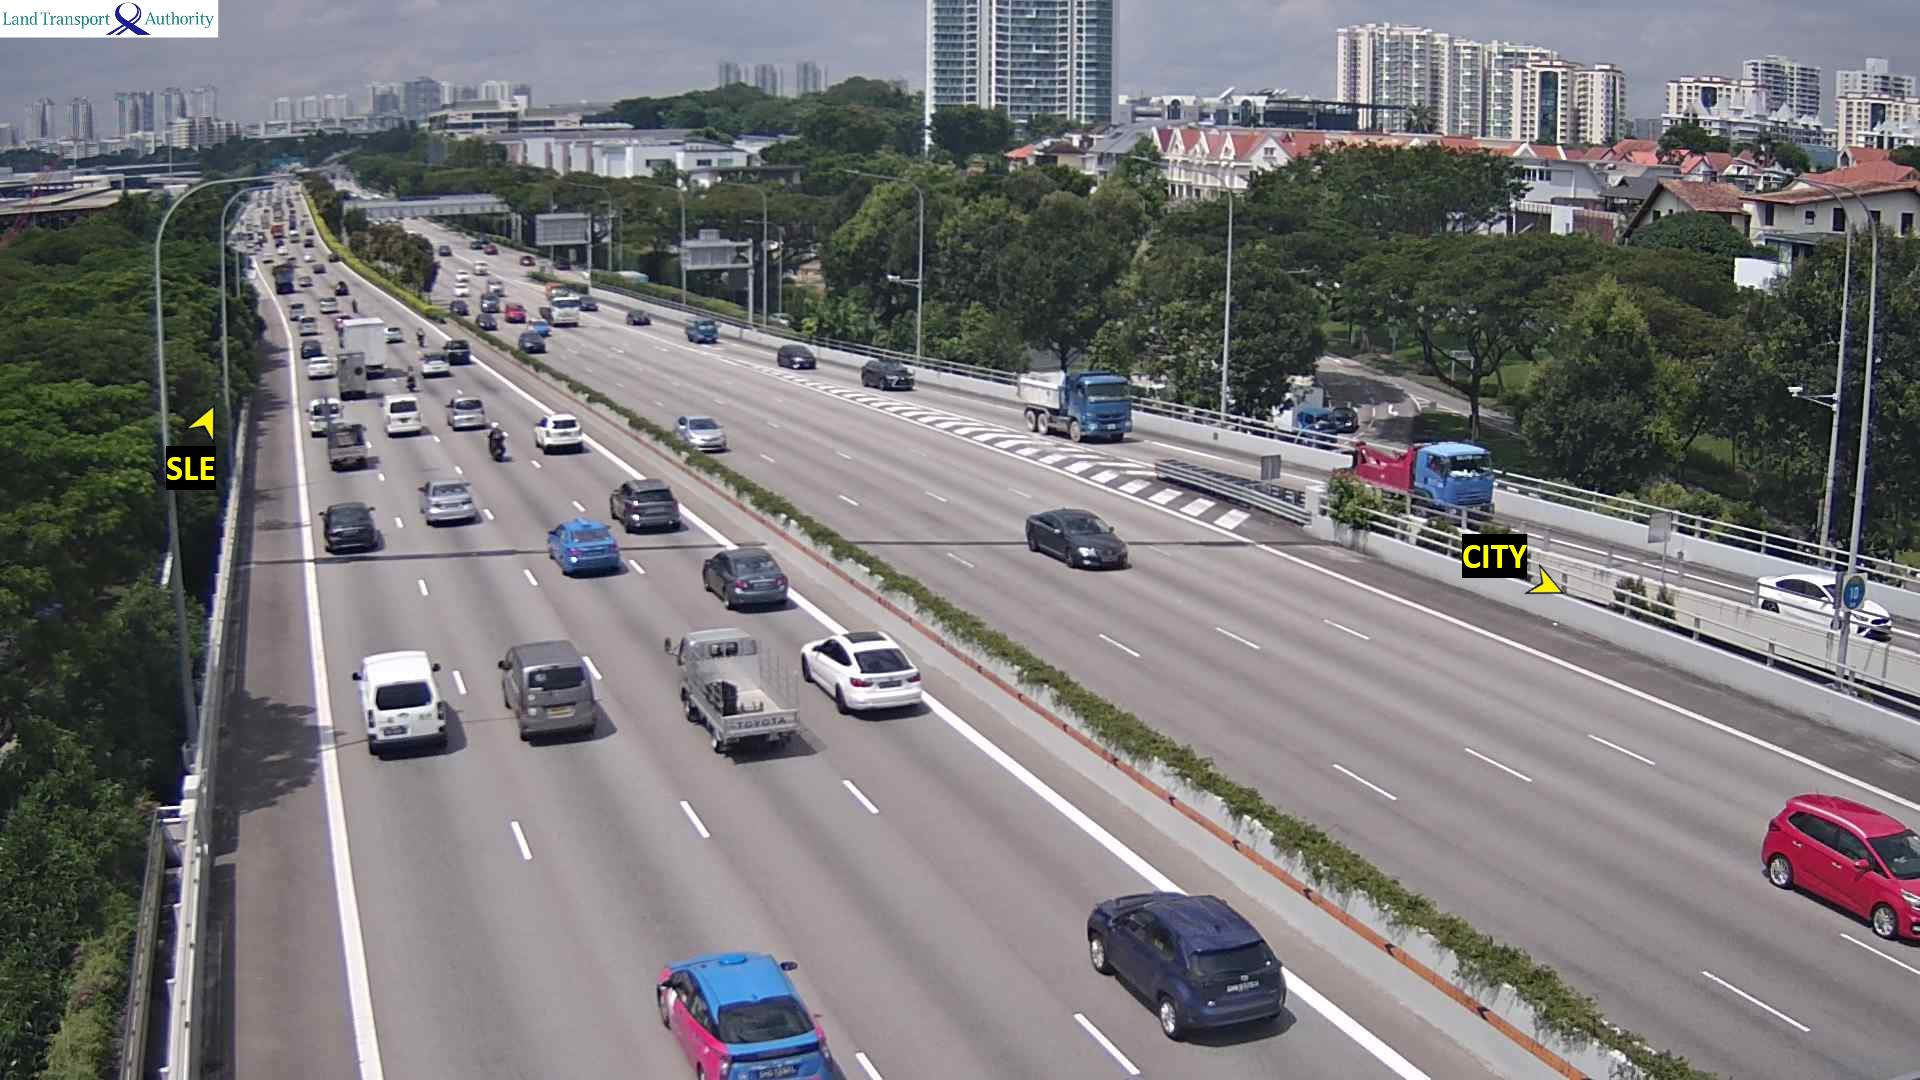

In [5]:
image(1702)

In [6]:
record(1702)

,CameraID,Latitude,Longitude,ImageLink,timestamp,density1,density2,prob1,prob2
0,1702,1.34355,103.860198,https://dm-traffic-camera-itsc.s3.ap-southeast...,1667801220000,43.333,13.333,0.480639,0.13333
